In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/Users/hanafahim/Downloads/CarPrices/CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


handling categorical values 

In [4]:
df['CarName']=df['CarName'].replace({'vokswagen rabbit':'volkswagen', 'porcshce panamera':'porsche','toyouta tercel':'toyota'})

In [5]:
pattern = r'(\b[a-zA-Z]+)\s'
df['car_brand'] = df['CarName'].str.extract(pattern)

In [6]:
df=df.drop(columns=['CarName'], axis=1)

In [7]:
object_columns = df.select_dtypes(include='object')
print(object_columns)

    fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0        gas        std        two  convertible        rwd          front   
1        gas        std        two  convertible        rwd          front   
2        gas        std        two    hatchback        rwd          front   
3        gas        std       four        sedan        fwd          front   
4        gas        std       four        sedan        4wd          front   
..       ...        ...        ...          ...        ...            ...   
200      gas        std       four        sedan        rwd          front   
201      gas      turbo       four        sedan        rwd          front   
202      gas        std       four        sedan        rwd          front   
203   diesel      turbo       four        sedan        rwd          front   
204      gas      turbo       four        sedan        rwd          front   

    enginetype cylindernumber fuelsystem car_brand  
0         dohc        

In [8]:
df['fueltype']=df['fueltype'].replace({'gas':1,'diesel':0})

In [9]:
df['aspiration']=df['aspiration'].replace({'std':1,'turbo':0})

In [10]:
df['doornumber']=df['doornumber'].replace({'four':4,'two':2})

In [11]:
df['enginelocation']=df['enginelocation'].replace({'front':1,'rear':0})

In [12]:
df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3})

In [13]:
object_columns = df.select_dtypes(include='object')
print(object_columns)

         carbody drivewheel enginetype fuelsystem car_brand
0    convertible        rwd       dohc       mpfi    romero
1    convertible        rwd       dohc       mpfi    romero
2      hatchback        rwd       ohcv       mpfi    romero
3          sedan        fwd        ohc       mpfi      audi
4          sedan        4wd        ohc       mpfi      audi
..           ...        ...        ...        ...       ...
200        sedan        rwd        ohc       mpfi     volvo
201        sedan        rwd        ohc       mpfi     volvo
202        sedan        rwd       ohcv       mpfi     volvo
203        sedan        rwd        ohc        idi     volvo
204        sedan        rwd        ohc       mpfi     volvo

[205 rows x 5 columns]


checking correaltion between variables 

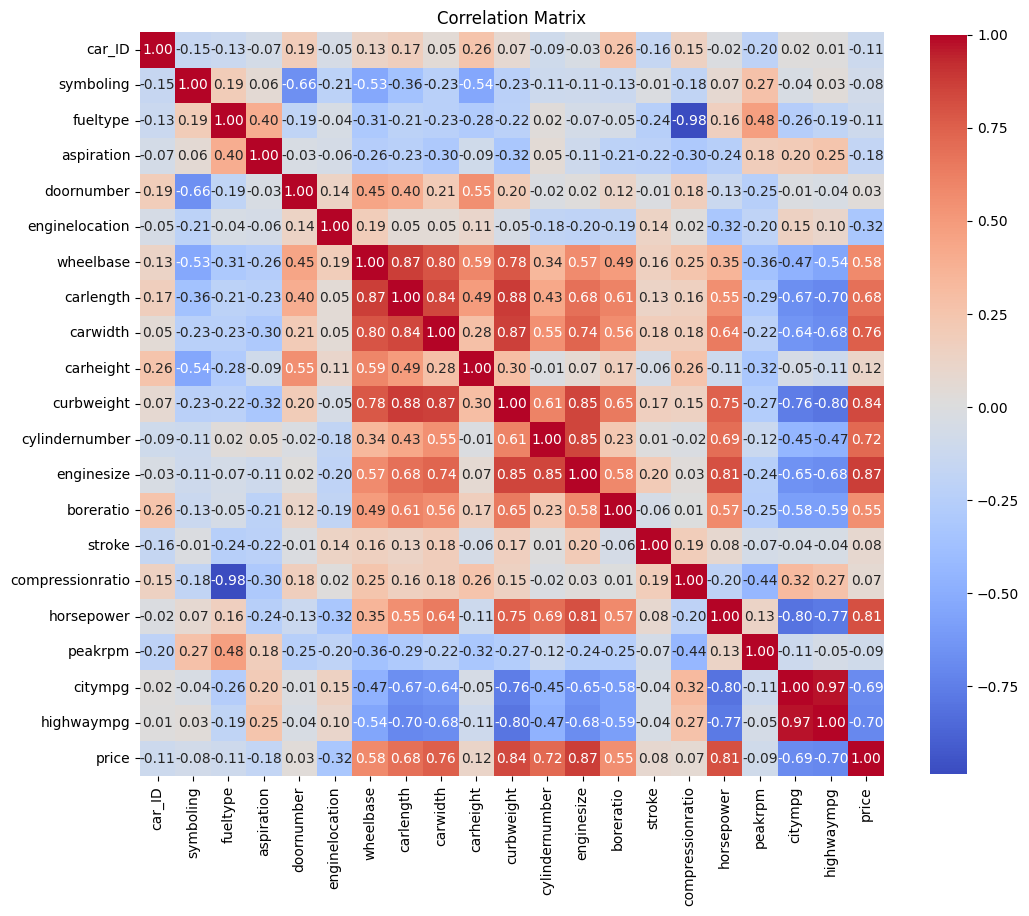

In [14]:
df_num=df.drop(df.select_dtypes(include='object'),axis=1)
correlation_matrix=df_num.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [15]:
corr_matrix = df_num.corr().abs()  
threshold = 0.8
# Select upper triangle of correlation matrix to avoid duplicate pairs
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find pairs of features with correlation greater than the threshold
correlated_pairs = [(column, row) for column in upper_tri.columns for row in upper_tri.index if upper_tri.loc[row, column] > threshold]
# Display the result
print("Pairs of highly correlated features:")
for pair in correlated_pairs:
    print(pair)

Pairs of highly correlated features:
('carlength', 'wheelbase')
('carwidth', 'carlength')
('curbweight', 'carlength')
('curbweight', 'carwidth')
('enginesize', 'curbweight')
('enginesize', 'cylindernumber')
('compressionratio', 'fueltype')
('horsepower', 'enginesize')
('citympg', 'horsepower')
('highwaympg', 'citympg')
('price', 'curbweight')
('price', 'enginesize')
('price', 'horsepower')


In [16]:
df=df.drop(columns=['citympg','highwaympg','enginesize','carlength','fueltype'],axis=1) #dropping fuel type cause compression ratio and fueltype are highly correlated

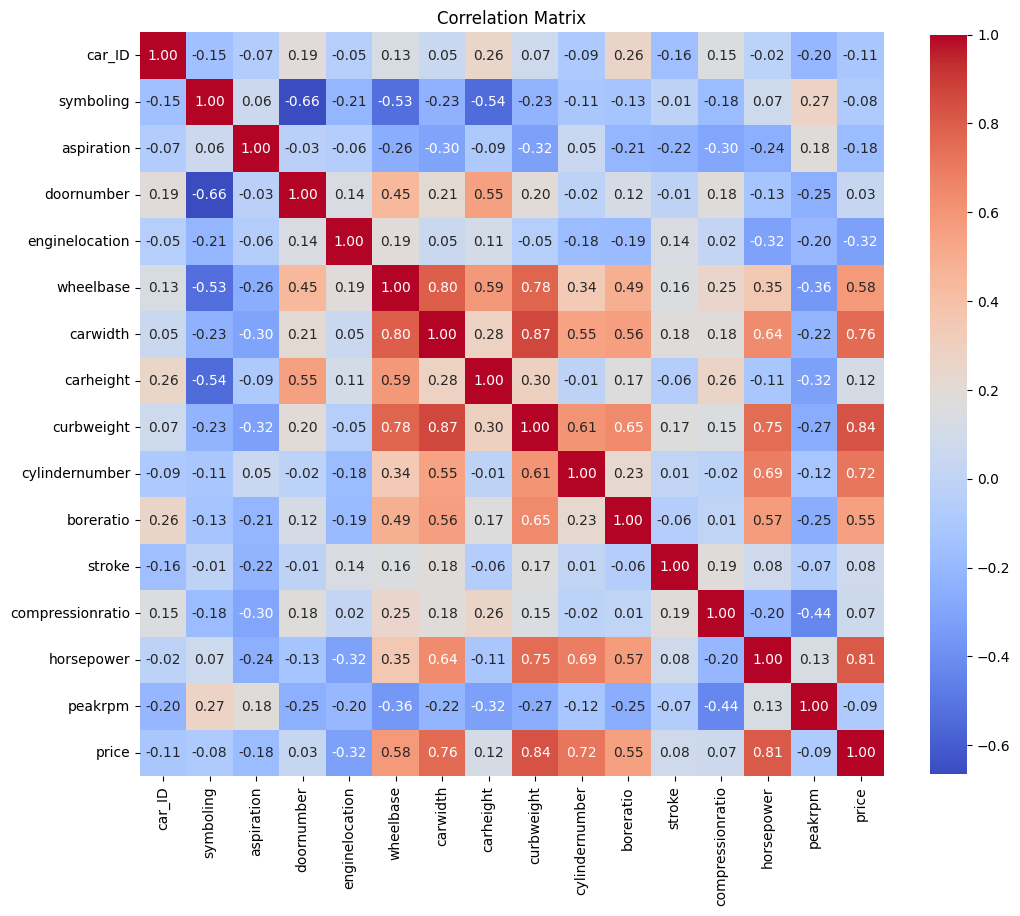

In [17]:
df_num=df.drop(df.select_dtypes(include='object'),axis=1)
correlation_matrix=df_num.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [18]:
corr_matrix = df_num.corr().abs()  # Absolute value of correlation

# Define the threshold for high correlation
threshold = 0.8

# Select upper triangle of correlation matrix to avoid duplicate pairs
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs of features with correlation greater than the threshold
correlated_pairs = [(column, row) for column in upper_tri.columns for row in upper_tri.index if upper_tri.loc[row, column] > threshold]

# Display the result
print("Pairs of highly correlated features:")
for pair in correlated_pairs:
    print(pair)

Pairs of highly correlated features:
('curbweight', 'carwidth')
('price', 'curbweight')
('price', 'horsepower')


In [19]:
df.select_dtypes(include='object')

,carbody,drivewheel,enginetype,fuelsystem,car_brand
0,convertible,rwd,dohc,mpfi,romero
1,convertible,rwd,dohc,mpfi,romero
2,hatchback,rwd,ohcv,mpfi,romero
3,sedan,fwd,ohc,mpfi,audi
4,sedan,4wd,ohc,mpfi,audi
...,...,...,...,...,...
200,sedan,rwd,ohc,mpfi,volvo
201,sedan,rwd,ohc,mpfi,volvo
202,sedan,rwd,ohcv,mpfi,volvo
203,sedan,rwd,ohc,idi,volvo


In [20]:
df_encoded = pd.get_dummies(df, columns=['drivewheel', 'carbody','enginetype','fuelsystem','car_brand'])
df_encoded=df_encoded.replace({True:1,False:0})


In [21]:
df_encoded=df_encoded.drop(columns=['car_ID'],axis=1)

In [22]:
df_encoded

,symboling,aspiration,doornumber,enginelocation,wheelbase,carwidth,carheight,curbweight,cylindernumber,boreratio,...,car_brand_plymouth,car_brand_porsche,car_brand_renault,car_brand_romero,car_brand_saab,car_brand_subaru,car_brand_toyota,car_brand_volkswagen,car_brand_volvo,car_brand_vw
0,3,1,2,1,88.6,64.1,48.8,2548,4,3.47,...,0,0,0,1,0,0,0,0,0,0
1,3,1,2,1,88.6,64.1,48.8,2548,4,3.47,...,0,0,0,1,0,0,0,0,0,0
2,1,1,2,1,94.5,65.5,52.4,2823,6,2.68,...,0,0,0,1,0,0,0,0,0,0
3,2,1,4,1,99.8,66.2,54.3,2337,4,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,1,4,1,99.4,66.4,54.3,2824,5,3.19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,4,1,109.1,68.9,55.5,2952,4,3.78,...,0,0,0,0,0,0,0,0,1,0
201,-1,0,4,1,109.1,68.8,55.5,3049,4,3.78,...,0,0,0,0,0,0,0,0,1,0
202,-1,1,4,1,109.1,68.9,55.5,3012,6,3.58,...,0,0,0,0,0,0,0,0,1,0
203,-1,0,4,1,109.1,68.9,55.5,3217,6,3.01,...,0,0,0,0,0,0,0,0,1,0


In [23]:
print(df_encoded.select_dtypes(include='object'))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[205 rows x 0 columns]


In [24]:
df_encoded=df_encoded.sample(frac=1,random_state=42).reset_index(drop=True)
split_idx = int(0.8 * len(df_encoded))
x=df_encoded.drop(columns=['price'],axis=1)
y=df_encoded[['price']]
y_train=y[:split_idx]
y_test=y[split_idx:]
x_train=x[:split_idx]
x_test=x[split_idx:]

In [25]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [26]:
def zscore_normalise_features(x):
    mu = np.mean(x, axis=0)
    sd = np.std(x, axis=0)

    # Prevent division by zero
    sd_safe = np.where(sd == 0, 1e-10, sd)  # Replace 0 with a small constant

    x_norm = (x - mu) / sd_safe  # Use safe standard deviation for normalization
    return mu, sd_safe, x_norm

mu,sd,x_norm_train=zscore_normalise_features(x_train)

In [27]:
def compute_cost(x,y,w,b):
    m,n=np.shape(x)
    cost=0
    for i in range (m):
        cost=cost+ (np.dot(x[i],w)+b-y[i])**2
    cost/=(2*m)
    return cost

In [35]:
def compute_gradient(x,y,w,b):
    m,n=np.shape(x)
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range(m):
        err=(np.dot(w,x[i])+b-y[i])
        dj_db=dj_db+err
        for j in range (n):
            dj_dw[j]=dj_dw[j]+err*x[i,j]
    dj_dw/=m
    dj_db/=m
    return dj_dw,dj_db
m,n=np.shape(x_train)
w=np.zeros((n,))
b=0

In [29]:
def gradient_descent(x,y,w,b,alpha,num_iters):
    j_history=[]
    for i in range(num_iters):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        j_history.append(compute_cost(x,y,w,b))
    return w,b,j_history  
b=0
num_iters=350
w_fin,b_fin,j_hist=gradient_descent(x_norm_train,y_train,w,b,0.02,num_iters)

/var/folders/hq/31k7qhxj16315fvc4cc2j2b00000gn/T/ipykernel_63954/869326222.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j]=dj_dw[j]+err*x[i,j]


(350,)
(350, 1)


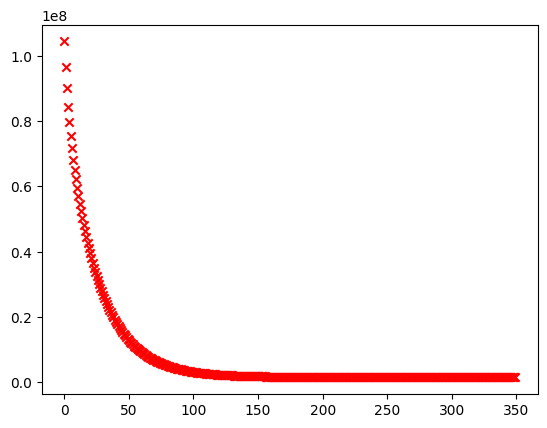

In [30]:
iters=np.arange(num_iters)
print(np.shape(iters))
j_hist=np.array(j_hist)
print(np.shape(j_hist))
plt.scatter(iters,j_hist,color='red',marker='x')

In [31]:
m,n=np.shape(x_test)
p,q=np.shape(x_train)
y_pred=np.zeros((m,))
y_train_pred=np.zeros((p,))

x_test_norm=(x_test-mu)/sd
for i in range(m):
    y_pred[i]+=(np.dot(x_test_norm[i],w_fin)+b_fin[0])
for i in range(p):
    y_train_pred[i]+=(np.dot(x_norm_train[i],w_fin)+b_fin[0])

In [32]:
y_train=y_train.reshape(p,)
y_test=y_test.reshape(m,)

In [33]:
def r2_score(y_actual, y_pred):
    ss_tot=np.sum((y_actual-np.mean(y_actual))**2)
    ss_res=np.sum((y_actual-y_pred)**2)
    return (1-ss_res/ss_tot)

In [34]:
r2_train=r2_score(y_train,y_train_pred)
r2_test=r2_score(y_test,y_pred)
print(f"training r2 score: {round(r2_train*100)}%")
print(f"testing r2 score: {round(r2_test*100)}%")

training r2 score: 95%
testing r2 score: 90%
